# 1. kNN分类算法

## 1.1 数据集

数据集的散点图,举例.

X.shape:(26, 2)


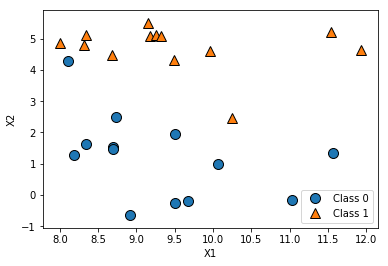

In [3]:
import mglearn
import matplotlib.pyplot as plt

# generate dataset
X,y = mglearn.datasets.make_forge()
# X是一个二维的np数组
# y是一个一维的np数组

# plot dataset
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["Class 0", "Class 1"])
plt.xlabel("X1")
plt.ylabel("X2")
print("X.shape:{}".format(X.shape))
plt.show()


特征数目: 2
样本数目: 26
类别: 2

## 1.2 求N维空间中两点之间的距离


In [4]:
import numpy as np

def distance(p1, p2):
    """返回两点间的距离(欧几里得距离, Euclidean distance)
       这个定义具有普遍性,可用于计算N维空间中的两点的距离.
    """
    return np.sqrt(np.sum(np.power(p1 - p2, 2)))

a = np.array([4,0])
c = np.array([4,3])

print(distance(a,c))

x = np.array([0,0,0,0])
y = np.array([4,3,2,2])

print(distance(x,y))


3.0
5.744562646538029


## 1.3. 投票函数

In [5]:
# 类似于求词频的函数count_words(text), 定义如下函数count_votes(votes).

def count_votes(votes):
    count_dict ={}
    for vote in votes:
        # known word
        if vote in count_dict:
            count_dict[vote] += 1
        else:
            count_dict[vote] = 1
    return count_dict

# 定义一个序列
votes = [1,2,1,3,4,2,2,2,3,3,2,3,3]

# 调用函数,得到字典
vote_count = count_votes(votes)
vote_count

{1: 2, 2: 5, 3: 5, 4: 1}

In [6]:
for vote, counts in vote_count.items():
    print(vote, counts)

1 2
2 5
3 5
4 1


一个序列中可能有多个最高频者(胜利者). 所以我们用列表来保存它们,命名为winners.

我们从众多的胜利者中选出一个.我们随机选择一个. 引用random模块,如下:

In [7]:
import random 

def majority_vote(votes):
    count_dict ={}
    
    for vote in votes:
        # 已见过的选项(vote)
        if vote in count_dict:
            count_dict[vote] += 1
        # 未见过的选项
        else:
            count_dict[vote] = 1
            
    winners = []       
    max_count = max(count_dict.values())
    for vote, counts in count_dict.items():
        if counts == max_count:
            winners.append(vote)
    return random.choice(winners)

majority_vote(votes)

3

如何找到一个数组的模式?  

scipy.stats.mode()可直接实现之. 
majority_vote(votes)更简洁版本:

In [8]:
import numpy as np
import scipy.stats as ss # 导入scipy.stats(约定)

def majority_vote_simple(votes):
    """
    返回序列中的最高频元素.
    输入:NumPy数组
    """
    mode, count = ss.mstats.mode(votes)
    return mode

votes = [1,2,1,1,2,3,1,5,6,3]
votes = np.array(votes)
majority_vote_simple(votes)

array([1.])

In [9]:
random.choice([2])

2

## 4. 如何找到最近邻居?

[-1.5, 1.5, -1.5, 1.5]

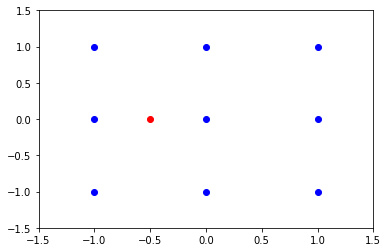

In [10]:
# 先举例:可视化所有的点
import matplotlib.pyplot as plt

points = np.array([[-1,-1],[-1,0],[-1,1],[0,-1],[0,0],[0,1],[1,-1],[1,0],[1,1]]) 
p = np.array([-.5, 0])

plt.plot(points[:,0], points[:,1], "ob");
plt.plot(p[0],p[1], "or")

# 设置作图范围
plt.axis([-1.5,1.5,-1.5,1.5])

p点与序列中的点的距离: [1.11803399 0.5        1.11803399 1.11803399 0.5        1.11803399
 1.80277564 1.5        1.80277564]


[-1.5, 1.5, -1.5, 1.5]

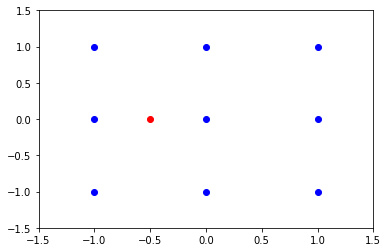

In [11]:

import matplotlib.pyplot as plt

points = np.array([[-1,-1],[-1,0],[-1,1],[0,-1],[0,0],[0,1],[1,-1],[1,0],[1,1]]) 
p = np.array([-.5, 0])

distances = np.zeros(points.shape[0])
for i in range(len(distances)):
    distances[i] = distance(points[i],p)

# 打印出points中的点与p点的距离.
print("p点与序列中的点的距离:",distances)

plt.plot(points[:,0], points[:,1], "ob");
plt.plot(p[0],p[1], "or")

# 设置作图范围
plt.axis([-1.5,1.5,-1.5,1.5])

如何对这些距离按由小到大顺序做排序?  NumPy中有一个这样的函数argsort(). 它返回最小的k个值的index.

现在,我们可以写出求k个最近邻居的函数: find_nn(p,points,k)

最近的3个点的索引:
[1 4 0]
最近的3个点的坐标:
[[-1  0]
 [ 0  0]
 [-1 -1]]


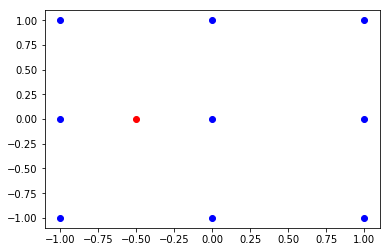

In [12]:
def find_nn(p,points, k=3):
    """
    返回(points集合中)距离p点最近的k个点的索引值.
    """
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(points[i],p)
    ind = np.argsort(distances)
    # 计算出距离值(由小到大排序):
    #return ind[0:k]
    return ind[:k]  

k = 3
points = np.array([[-1,-1],[-1,0],[-1,1],[0,-1],[0,0],[0,1],[1,-1],[1,0],[1,1]]) 
p = np.array([-.5, 0])
ind = find_nn(p,points,k)
print("最近的{}个点的索引:\n{}".format(len(ind),ind))
print("最近的{}个点的坐标:\n{}".format(len(ind),points[ind]))

#作图
plt.plot(points[:,0],points[:,1],"bo")
plt.plot(p[0],p[1],"ro")

## 4. 预言一个新的点的类别(class)

写一个函数实现:预言一个新点的类别. 
    
    找出距离p点最近的k个邻居的索引值;
    选出这些邻居中落在各类的次数
    

所属类别: 1


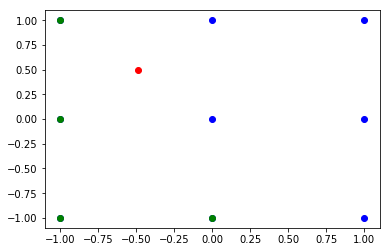

In [13]:
# outcomes为已知点points的类别
def knn_predict(p, points, outcomes, k=3):
    """返回新点p的类别."""
    ind = find_nn(p, points, k)
    #print("ind: ",ind)
    return majority_vote(outcomes[ind])
    
outcomes = np.array([0,0,0,0,1,1,1,1,1])
p = np.array([-.49,.5])
points = np.array([[-1,-1],[-1,0],[-1,1],[0,-1],[0,0],[0,1],[1,-1],[1,0],[1,1]])
res = knn_predict(p, points,outcomes,3)
print("所属类别:",res)

#作图
plt.plot(points[:,0],points[:,1],"bo")
plt.plot(points[:4,0],points[:4,1], "go")
plt.plot(p[0],p[1],"ro")

## 5. 产生数据

end points:
bivariate:
ipstats 模块


In [14]:
def generate_synth_data(n=50):
    points = np.concatenate((ss.norm(0,1).rvs((n,2)), ss.norm(1,1).rvs((n,2))), axis =0)
    outcomes = np.concatenate((np.repeat(0,n),np.repeat(1,n))) 
    return (points, outcomes)

generate_synth_data(n=50)
    

(array([[ 1.32596094e+00, -1.61942977e+00],
        [ 9.92916420e-01, -8.19078704e-01],
        [ 1.77170353e+00,  1.57982164e-01],
        [ 6.59060181e-01, -6.29709411e-01],
        [-4.46781310e-01,  8.88934673e-01],
        [-1.23730531e+00,  4.57310183e-01],
        [ 2.12212062e-01,  1.99974814e+00],
        [-2.76736007e-01,  6.19152382e-01],
        [ 1.32053844e-01, -1.33362267e+00],
        [-3.96914746e-01, -1.06738922e+00],
        [-8.25120247e-01, -7.90098187e-01],
        [-1.83267954e+00,  6.28196780e-01],
        [-1.45386645e+00,  1.11176276e+00],
        [ 1.28789082e+00, -5.85893237e-01],
        [ 3.66974186e-01, -6.85190355e-01],
        [ 2.80506185e-01,  7.30302406e-01],
        [-1.03603024e+00,  1.25973616e+00],
        [-7.79735302e-01,  7.09803278e-01],
        [-6.24987166e-01, -1.89735022e-01],
        [ 5.58979584e-01, -7.02663319e-01],
        [-2.20612030e+00, -6.68820273e-01],
        [ 7.00985737e-01, -5.45807442e-01],
        [-9.86677001e-01,  2.852

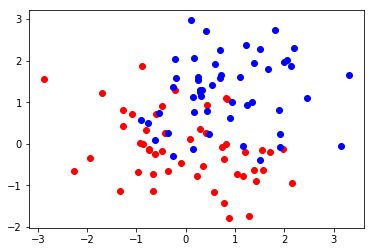

In [15]:
points, outcomes = generate_synth_data(n=50)

plt.figure()
n = 50
plt.plot(points[:n,0], points[:n,1], "ro")
plt.plot(points[n:,0], points[n:,1], "bo")
plt.savefig("bivaradata.pdf")

## 6. 制作预测Grid

In [16]:
def make_pred_grid(predictors,outcomes,limits,h,k):
    (x_min,x_max, y_min,y_max) = limits
    xs = np.arange(x_min,x_max,h) # h
    ys = np.arange(y_min,y_max,h)
    xx, yy = np.meshgrid(xs,ys)
    
    pred_grid = np.zeros(xx.shape, dtype = int)
    for i, x in enumerate(xs):
        for j, y in enumerate(ys):
            p = np.array([x,y])
            pred_grid[j,i] = knn_predict(p,predictors,outcomes,k)
            
    return (xx,yy,pred_grid)

## 7. 对格点作图 

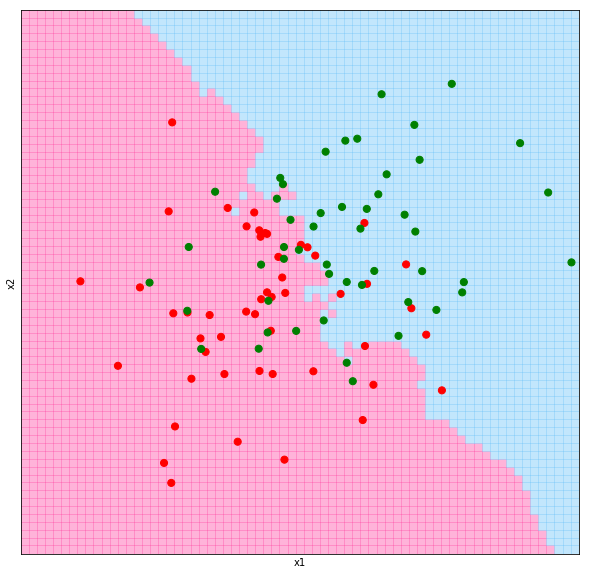

In [39]:
def plot_pred_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","yellowgreen","lightskyblue" ])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel("x1"); plt.ylabel("x2")
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)
    

(predictors, outcomes) = generate_synth_data()

k = 15 ; filename = "knn_synth_5.pdf"
limits = (-3,4,-3,4) ;   h = 0.1

(xx,yy, pred_grid) = make_pred_grid(predictors,outcomes,limits,h,k)
plot_pred_grid(xx,yy, pred_grid, filename)



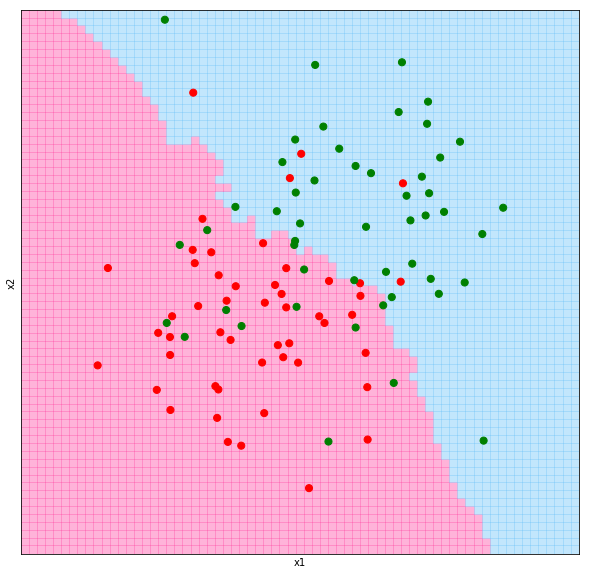

In [18]:
(predictors, outcomes) = generate_synth_data()

k = 15 ; filename = "knn_synth_13.pdf"
limits = (-3,4,-3,4) ;   h = 0.1

(xx,yy, pred_grid) = make_pred_grid(predictors,outcomes,limits,h,k)
plot_pred_grid(xx,yy, pred_grid, filename)

## 8. Scikit-learn的使用


In [40]:
import pandas as pd
# 生成数据集: X中每个样本仅有一个特征. 
X_train = pd.DataFrame([ [0], [1], [2], [3] ])
y_train = [0, 0, 1, 1]
X_train

,0
0,0
1,1
2,2
3,3


In [41]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

In [42]:
model.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [43]:
model.predict([[1.1],[3.3]])

array([0, 1])

In [23]:
model.score([[0.9],[0.3]],[0,1])

0.5

## kNN特点:
    1. kNN is particularly useful when no other model fits your data well, 
    因为它是一个不需要参数的分类方法. 例如,你不需要考虑你的数据是线性可分还是线性不可分.
    
    2. 要想用kNN算法,我们的数据必须是可测的(数据集上有距离可以定义出来).

# 2. 线性模型   

In [24]:
# 导入模块:
import mglearn 
import numpy as np
import matplotlib.pyplot as plt  

from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.linear_model import LinearRegression 

对于只有一个特征的数据集,

$\hat y = w[0]*x[0] + b$

$w[0]$是斜率, $b$是y轴上的截距. $\hat y$称为response, 是模型的\____.

对于只有$p+1$个特征的数据集,

$\hat y = w[0]*x[0]+ ...+ w[p]*x[p] + b$

我们也可把$\hat y$看作是输入特征$x[0],x[1],...,x[p]$的带权重的求和.

lr.coef_:[0.47954524]
lr.intercept_:-0.09847983994403892
Traing set score: 0.653
Test set score:0.773


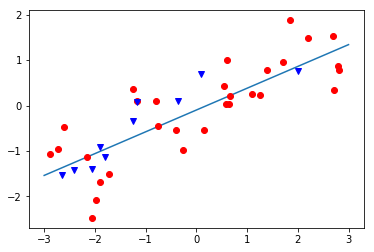

In [25]:
#linear_regression.py  
import mglearn  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
import numpy as np

#生成数据集: 只有一个特征的数据集
X, y = mglearn.datasets.make_wave(n_samples=40)  
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)  
# print(X.shape)

lr = LinearRegression().fit(X_train, y_train)

# 斜率和截距
# w are stored in the coef_ attribute,  
# b is stored in the intercept_ attribute. 
print("lr.coef_:{}".format(lr.coef_))  
print("lr.intercept_:{}".format(lr.intercept_))  

# 拟合优度  
print("Traing set score: {:.3f}".format(lr.score(X_train,y_train)))  
print("Test set score:{:.3f}".format(lr.score(X_test,y_test)))

line = np.linspace(-3,3, 1000).reshape(-1,1) 
plt.plot(line[:,0], line[:,0]*lr.coef_ + lr.intercept_)
plt.plot(X_train[:,0],y_train, "o", c="r")
plt.plot(X_test[:,0],y_test, "v", c="b")
plt.show()

当你的特征数目( p+1p+1 )大于你的数据点的数目(样本个数)时,目标 yy 往往可以用线性模型很好地预测出来.

下面就是一个例子.这个例子中,特征数目为506,样本数目104. 前者大于后者.

In [26]:
# 岭回归
import mglearn  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import Ridge  
  
X, y = mglearn.datasets.load_extended_boston()   
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)  
ridge = Ridge().fit(X_train, y_train)  
print(X.shape)  
# w are stored in the coef_ attribute,  
# b is stored in the intercept_ attribute.  
print("ridge.coef_:{}".format(ridge.coef_))  
print("ridge.intercept_:{}".format(ridge.intercept_))  
  
print("Traing set score: {:.3f}".format(ridge.score(X_train,y_train)))  
print("Test set score:{:.3f}".format(ridge.score(X_test,y_test))) 

(506, 104)
ridge.coef_:[-1.70295812e+00 -1.21646220e+00 -2.26391270e+00  8.30845896e-01
 -8.58331367e-02  8.01116071e+00 -5.65999560e-03 -4.69520099e+00
  3.64886980e+00 -1.76903379e+00 -1.84601461e+00  2.32007300e+00
 -2.80633098e+00 -1.00796122e+00  5.43017764e-03 -1.05926024e+00
  1.58394405e+00 -1.66367827e+00 -1.33734211e+00 -1.24701369e+00
 -3.45676068e-01 -1.97789722e+00 -1.71426435e+00 -1.55777662e+00
 -1.22046160e+00 -1.18685106e+00  1.86974330e+00 -1.84090506e+00
  2.15362590e+00  3.33286814e-01  3.44159376e+00 -1.96103914e+00
 -4.39026619e-01 -1.86641840e-01  3.53642680e-01  6.52130195e-01
 -1.00510187e+00 -1.77202481e+00  3.42271888e+00  1.40820125e+00
  8.83430865e-01 -3.91620276e+00  2.18270833e+00 -3.72297245e+00
  1.10970075e+00  2.54657815e+00 -1.16437597e+00 -5.84765670e-01
 -1.92913457e+00  8.30845896e-01 -4.88404275e+00 -3.65276071e+00
  1.33691241e+00 -1.17583545e+00  2.82947313e+00  3.21863173e+00
  3.94714722e-01  1.80083969e+00 -2.30349790e+00 -1.68219494e+00
 -

In [27]:
#lasso001_regression.py  
import mglearn  
import matplotlib.pyplot as plt  
  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import Lasso  
  
X, y = mglearn.datasets.load_extended_boston()  
  
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)  
lasso01 = Lasso(alpha=0.001,max_iter=10000).fit(X_train, y_train)  
  
print("lasso.coef_:{}".format(lasso01.coef_))  
print("lasso.intercept_:{}".format(lasso01.intercept_))  
print("No.of features used:{}".format(np.sum(lasso01.coef_!=0)))  

print("Traing set score: {:.2f}".format(lasso01.score(X_train,y_train)))  
print("Test set score:{:.2f}".format(lasso01.score(X_test,y_test)))  

lasso.coef_:[ -0.          -0.         -10.20656209  13.33609506   0.63881475
  48.96128811  18.93743693 -36.19688654  14.10300593  -0.
   0.          28.98284998  13.68445403  -0.           0.
  -0.         252.64349932  -0.           0.          -0.
  -0.         -17.53882962  -0.          -0.           0.
   0.           2.4754909   -0.          -0.           0.
   1.65589239  -6.86874831  -6.3198252   -0.           9.78128386
   0.90946864  -0.         -12.07756684   2.12838627   0.
  24.27027891   1.13674649   2.2958079    0.           7.97332068
  13.45793201  -2.34211132  -0.          -9.9320061    1.14763668
 -15.33902582 -23.47963408   2.5104258    5.16737446  -2.80966947
  -0.          -3.27683571   4.35108324  -9.67012621   0.
  -3.37769417 -19.28356932   9.62013497  -5.27186612  -0.
  -7.6394013    3.27019118   0.          13.60313271 -12.05520577
  -0.         -15.30710385 -10.73641882 -21.42127154   4.32974595
 -23.08253709   0.97906033   0.          16.1457672   -6.59149

D:\programs\Anaconda3\envs\base_cp\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


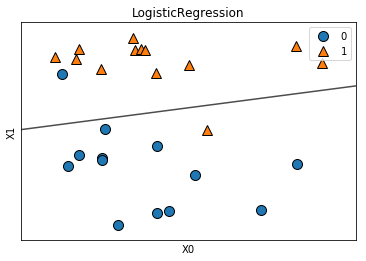

In [28]:
# 续:线性逻辑回归分类器 
import mglearn  
import matplotlib.pyplot as plt  
from sklearn.linear_model import LogisticRegression  
from sklearn.svm import LinearSVC  
  
X,y = mglearn.datasets.make_forge()   
clf = LogisticRegression().fit(X,y)  

mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, alpha=.7)  
mglearn.discrete_scatter(X[:, 0], X[:,1], y)  
plt.title("{}".format("LogisticRegression"))  
plt.xlabel("X0")  
plt.ylabel("X1")  
plt.legend()  
plt.show()

In [29]:
from math import log  
 
def calc_shannon_ent(data_set):  
    """ 
    计算香农熵 : 前提：（数据集要足够大！）
    :param data_set:数据集 
    :return: 计算结果 
    """  
    num_entries = len(data_set) #保存数据集中实例的总数 （N） 
    label_counts = {}  
    #-----------------------  
    # 为所有可能分类创建字典  
    #-----------------------  
    for vec in data_set: # 遍历每个实例(样本)，统计标签的频数  
        current_label = vec[-1]  #设样本的最后一列的数值为键值  
        if current_label not in label_counts.keys():  
            label_counts[current_label] = 0  
        label_counts[current_label] += 1  
    shannon_ent = 0.0  
    for key in label_counts:  
        prob = float(label_counts[key]) / num_entries  
        shannon_ent -= prob * log(prob,2) # 以2为底的对数  
    return shannon_ent  


In [30]:
#创建数据集  
def create_data_set():  
    data_set = [[1,1,'y'],  
                [1,1,'y'],  
                [1,0,'n'],  
                [0,0,'n'],
                [0,0,'n'],
                [1,0,'n'],
                [1,1,'y']  
                ]  
    labels = ['gill', 'fin']  
    return data_set, labels 

In [31]:
binary_set = [[1,'y'],
              [0,'n'],
              [0,'n'],
              [0,'n']]  
print(calc_shannon_ent(binary_set))

0.8112781244591328


In [32]:
#使用自定义函数来计算香农熵
my_data,labels = create_data_set()  
print(my_data) 

print(calc_shannon_ent(my_data))  

[[1, 1, 'y'], [1, 1, 'y'], [1, 0, 'n'], [0, 0, 'n'], [0, 0, 'n'], [1, 0, 'n'], [1, 1, 'y']]
0.9852281360342516


In [33]:
# 划分数据集
def split_data_set(data_set, axis, value):  
    ''''' 
    按照给定特征划分数据集 
    :param data_set:待划分的数据集 
    :param axis:划分数据集所用的特征 
    :param value: 特征的返回值 
    :return: 划分结果列表 
    '''  
    ret_data_set = []   # 为了不修改原始数据,新建一个列表  
    for vec in data_set:  # vec: 样本, 某一行的数据  
        if vec[axis] == value:  
            reduced_vec = vec[:axis]    
            reduced_vec.extend(vec[axis+1:])  
            ret_data_set.append(reduced_vec)  
    return ret_data_set  
  
my_data,labels = create_data_set()  
print(my_data) 

print(split_data_set(my_data,0,0) )
print(split_data_set(my_data,2,"y") )
print(split_data_set(my_data,1,1) )

[[1, 1, 'y'], [1, 1, 'y'], [1, 0, 'n'], [0, 0, 'n'], [0, 0, 'n'], [1, 0, 'n'], [1, 1, 'y']]
[[0, 'n'], [0, 'n']]
[[1, 1], [1, 1], [1, 1]]
[[1, 'y'], [1, 'y'], [1, 'y']]


In [34]:
# 选择最好的划分方式
def best_feature_to_split(data_set): # data_set 必须是以长度相同的列表为元素的列表. 每个样本的最后一个元素是当前样本的类别标签  
    num_features = len(data_set[0])-1   # 求出当前数据集包含的特征的数目.  
    base_entropy = calc_shannon_ent(data_set) # 求出原始香农值  
    best_info_gain = 0.0   
    best_feature = -1  
    for i in range(num_features): # 遍历所有特征  
        feat_list = [example[i] for example in data_set] # 将所有第i个特征值或所有可能存在的值写入新列表  
        unique_values = set(feat_list)   # 去除重复元素  
        new_entropy = 0.0   
        for value in unique_values: #遍历所有唯一特征值  
            sub_data_set = split_data_set(data_set,i, value) #对每个特征划分一次数据集  
            prob = len(sub_data_set)/float(len(data_set))  
            new_entropy += prob * calc_shannon_ent(sub_data_set) # 对特征i, 计算数据集的新的香农熵.   
        info_gain = base_entropy - new_entropy 
        print(info_gain)
        if (info_gain > best_info_gain):  
            best_info_gain = info_gain # 取代原来的信息增益的值  
            best_feature = i  
    return best_feature  

my_data, labels = create_data_set()  
print("my_data:")  
print(my_data)  
print("best feature:")  
print(best_feature_to_split(my_data))  

my_data:
[[1, 1, 'y'], [1, 1, 'y'], [1, 0, 'n'], [0, 0, 'n'], [0, 0, 'n'], [1, 0, 'n'], [1, 1, 'y']]
best feature:
0.2916919971380598
0.9852281360342516
1


In [35]:
# Gini指数
def cal_gini_index(data_set):  
    """计算给定数据集的Gini指数 
    input: data(list): 数据集
    output: gini(float): Gini指数
    """  
    # Total no. of the sample  
    total_sample = len(data_set)  
    if len(data_set)==0:  
        return 0  
    # Count the no. of labels in the data set  
    label_counts = label_uniq_counts(data_set)  
  
    # Calculate the Gini index of the data set  
    gini = 0  
    for label in label_counts:  
        gini = gini + pow(label_counts[label],2)  
  
    gini = 1 - float(gini)/ pow(total_sample,2)  
    return gini  

In [36]:
#计算数据集中类别标签的个数
from math import pow  
  
def label_uniq_counts(data):  
    """ 
    input: data(list) 
    output: label_uniq_counts(int) 
    """  
    label_uniq_count ={}  
  
    for x in data:  
        label = x[len(x)-1] # 取得每个样本的类标签label  
        if label not in label_uniq_count:  # WHY?  
            label_uniq_count[label] = 0  
        label_uniq_count[label]  += 1  
    return label_uniq_count  

label_uniq_counts(my_data)

{'n': 4, 'y': 3}

In [37]:
# 训练决策树 (Geron)  
  
# 1. 导入模块  
from sklearn.tree import DecisionTreeClassifier  
import numpy as np  
    
#2. 创建自己的数据集  
  
#create dataset  
class Fish:  
    def __init__(self):  
        X = [[1,1],  
             [1,1],  
             [1,0],  
             [0,1],  
             [0,1]  
             ]  
        y = [1,1,0,0,0]  
        self.data = np.array(X)  
        self.label = np.array(y)  
        self.feature = np.array(['鳃','鳍'])     
# 训练集  
fs = Fish()  
  
print('X: ', fs.data)  
print('y:',fs.label)    
  
# 训练集的特征  
X = fs.data  
# 训练集的标签  
y = fs.label  
  
#3.1 分类器这个类之实例化  
tree_clf = DecisionTreeClassifier(max_depth=2)  
# 3.2 最终生成决策树模型  
tree_clf.fit(X,y)  
  
# 传入一个数据集,用决策树做预测  
# predict_proba(测试集): 返回值: 一个ndarray数组,其行数为样本个数,其列数为种类数.  
a = tree_clf.predict_proba([[1,1],[0,0]])  
# predict(测试集): 函数的返回值: 一个一维array数组,其列数为样本个数  
b = tree_clf.predict([[1,0]])  
c = tree_clf.predict([[1,1],[1,0]])  
print('测试样本为各类的概率:',a)  
print('分类预测结果',c)  


X:  [[1 1]
 [1 1]
 [1 0]
 [0 1]
 [0 1]]
y: [1 1 0 0 0]
测试样本为各类的概率: [[0. 1.]
 [1. 0.]]
分类预测结果 [1 0]


## 2.1  信息熵
度量样本集合纯度最常用的一种指标是信息熵. 

对于有$K$个分类的数据集$D$, 样本属于第$k$个类别的概率为$p_k$,定义信息熵(Information Entropy)为

$E = -\sum_{k=1}^K p_k \log_2(p_k)$.

信息熵，又叫香农熵.

例1. 对于一个数据集，计算其香农熵.

$E = -[（1/2）* \log(1/2) + (1/3)* \log(1/3) + (1/6)*\log(1/6)]$

In [38]:
#此例的数据集”
import numpy as np
a1 = np.log2(0.5)
a1

-1.0

## 2.2 Gini指数

与信息熵类似,对于有$K$个分类的数据集$D$, 样本属于第$k$个类别的概率为$p_k$,定义基尼指数

$\text{Gini}(D) = \sum_{k=1}^K p_k (1-p_k)$

这个定义可进一步简化为：

$\text{Gini}(D) = \sum_{k=1}^K (p_k - p_k^2) = 1-\sum_{k=1}^K p_k^2$.

## 决策森林算法原理

考虑一个具有1000个观测值的数据集(1000个样本). 我们有9个特征:$x_1, x_2, ..., x_9$.
比如,我们想建立50棵树. 首先将数据随机化.

我们首先从最初的数据中提取出50个bootstrap样本, 并对每个数据集都单独建立一棵树.

然后, 我们一一地拟合这些树. 从第一棵树和第一次分割,我们首先决定使用哪一个特征.

比如,当我们做第一次特征空间分割时, 如果我们被允许使用三个特征,(如$X_2, X_6, X_7)$. 
对于已知数据和这三个特征,我们尽力做最好的分割.  

然后,我们对该树做第二次分割.
这次,我们可能被允许使用的三个特征为$X_1,X_5,X_7$, 我们同样地尽力做最好的分割.

我们继续,直到我们拟合了第一棵树,也就是说,直到我们达到某个停止分割的标准.

然后,我们对森林中的其他所有的树实施同样的操作.

为了利用随机森林做预测, 对每一棵树,我们分别识别测试数据所在的那些特征空间区域.

基于此, 我们接下来,对于每一棵树我们分别做一次预测.
并将每个单独的树的预测结果结合起来, 形成森林的预测结果.